In [146]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import os

In [147]:
dir = "~/PhD/Intel-Neuromorphic-Research-Project/output/SC_test/"

output = pd.read_csv(os.path.expanduser(dir + "train_output.csv"))
training_hidden_spikes = np.load(os.path.expanduser(dir + "hidden_training_spike_counts.npy"))
validation_hidden_spikes = np.load(os.path.expanduser(dir + "hidden_validation_spike_counts.npy"))

In [148]:
for i in range(training_hidden_spikes.shape[0]):
     print(training_hidden_spikes[i, 1])

1
0
0
0
0
0
0
0
0
0


In [149]:
training_hidden_spikes.shape

(10, 512)

In [150]:
validation_hidden_spikes.shape

(10, 512)

In [151]:
train_sum_over_epoch = []
valid_sum_over_epoch = []
sum_over_epoch = []

In [152]:
validation_hidden_spikes.shape

(10, 512)

In [164]:
for i in range(training_hidden_spikes.shape[0]):
    train_sum_over_epoch.append(sum(training_hidden_spikes[i]))
    valid_sum_over_epoch.append(sum(validation_hidden_spikes[i]))

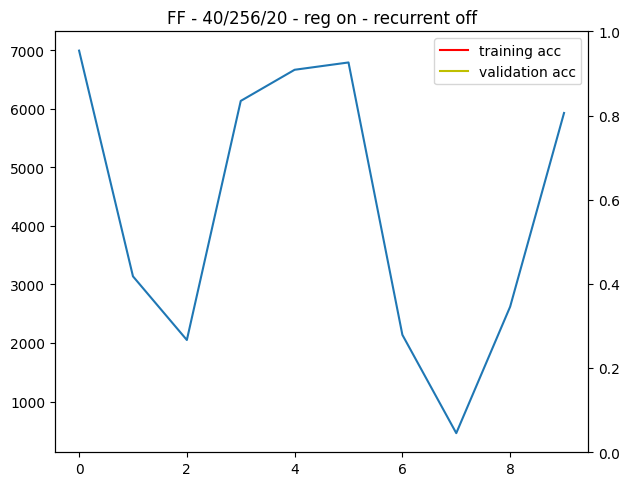

In [156]:
fig, ax1 = plt.subplots()

ax1.plot(train_sum_over_epoch, label = "average hidden layer spikes per training epoch")
ax1.plot(valid_sum_over_epoch, label = "average hidden layer spikes per validation epoch")

#ax1.plot(valid_sum_over_epoch, label = "average hidden layer spikes per validation epoch")
 
ax2 = ax1.twinx()

ax2.plot(list(output.loc[:, "accuracy"])[0::2], color = 'r', label = "training acc")
ax2.plot(list(output.loc[:, "accuracy"])[1::2], color = 'y', label = "validation acc")
ax2.set_ylim(0, 1)

fig.tight_layout()
plt.title("FF - 40/256/20 - reg on - recurrent off")
plt.legend()
plt.show()

In [157]:
with open("SC_params.json", "r") as f:
        params = json.load(f)

In [158]:
print(list(params) + ["accuracy"])

['dataset_directory', 'NUM_INPUT', 'NUM_HIDDEN', 'NUM_OUTPUT', 'BATCH_SIZE', 'INPUT_FRAME_TIMESTEP', 'INPUT_SCALE', 'NETWORK_SCALE', 'NUM_EPOCH', 'NUM_FRAMES', 'verbose', 'debug', 'record_all_hidden_spikes', 'lr', 'dt', 'reg_lambda_lower', 'reg_lambda_upper', 'reg_nu_upper', 'recurrent', 'evaluate', 'input_hidden_w_mean', 'input_hidden_w_sd', 'hidden_hidden_w_mean', 'hidden_hidden_w_sd', 'hidden_output_w_mean', 'hidden_output_w_sd', 'aug_combine_images', 'aug_swap_pixels', 'aug_swap_pixels_kSwap', 'aug_swap_pixels_pSwap', 'aug_swap_pixels_tSwap', 'cross_validation', 'cross_validation_run_all', 'sweeping_suffix', 'output_dir', 'model_description', 'accuracy']


In [159]:
# sandbox 

dictionary1 = {'hidden_spike_count': [1, 2, 3, 4]}
dictionary2 = {'hidden_spike_count': [5]}

dictionary3 = {key: value + dictionary2[key] for key, value in dictionary1.items()}

In [160]:
dictionary3

{'hidden_spike_count': [1, 2, 3, 4, 5]}

In [161]:
import math
file_path = os.path.expanduser("~/data/rawSC/rawSC_80input/")
x_train = np.load(file_path + "training_x_data.npy")
math.ceil(0.367)

1

In [162]:
example_filter = list(range(7, # random sample from trial, in this case the trial chosen is 7000 # x1.0 is for validation split!
                    params.get("NUM_EPOCH") * int(math.ceil((len(x_train) * 1.0) / params.get("BATCH_SIZE"))) * params.get("BATCH_SIZE"), 
                    int(math.ceil((len(x_train) * 1.0) / params.get("BATCH_SIZE"))) * params.get("BATCH_SIZE")))

In [163]:
example_filter

[7, 94983, 189959, 284935, 379911, 474887, 569863, 664839, 759815, 854791]